# <center><b> STUDENT PERFORMANCE </b></center>

The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.


Variables:

Hours Studied: The total number of hours spent studying by each student.

Previous Scores: The scores obtained by students in previous tests.

Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).

Sleep Hours: The average number of hours of sleep the student had per day.

Sample Question Papers Practiced: The number of sample question papers the student practiced.


Target Variable:

Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

Apart from that another target variable Pass is gonna be created. A student would be given 1 if the student scores above 50 in Performance Index or else 0.


Aim:

The dataset aims to provide insights into the relationship between the predictor variables and the performance index or created pass . Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance. 


Note:

Please note that this dataset is synthetic and created for illustrative purposes. The relationships between the variables and the performance index may not reflect real-world scenarios

## Importing basic libraries

In [316]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Uploading Student Performance csv File

In [317]:
df=pd.read_csv('Student_Performance.csv')

## First five rows of the dataset

In [318]:
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


## Information about the columns in the dataset

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


## Description about the columns in the dataset

In [320]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## Any Null values in any column of the dataset

In [321]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Since there are no Null values in the columns,it does not require Cleaning.

## Transforming Extracurricular Activities Column

Since the Extracurricular Activities contain only Yes and No (String), we need to tranform it into integer 1 or 0 in order to use it.

### Function which converts Yes to 1 and No to 0

In [322]:
def func(elem):
    if elem=='Yes':
        return 1
    else:
        return 0

### Tranforming the Extracurricular Activities column

In [323]:
df['Extracurricular Activities']=df['Extracurricular Activities'].apply(lambda x: func(x))

## Creating Pass Column

In [324]:
df['Pass']=df['Performance Index'].apply(lambda x: 1 if x>50 else 0)

## First five rows of the dataset

In [325]:
df.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Pass
0,7,99,1,9,1,91.0,1
1,4,82,0,4,2,65.0,1
2,8,51,1,7,2,45.0,0
3,5,52,1,5,2,36.0,0
4,7,75,0,8,5,66.0,1


## Correlation between the columns of the Dataset

In [326]:
dcorr=df.corr()
dcorr

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Pass
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730,0.234794
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189,0.799709
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525,0.011678
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106,0.032469
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268,0.023809
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000,0.834845
Pass,0.234794,0.799709,0.011678,0.032469,0.023809,0.834845,1.000000


## Exploratory Data Analysis

### Heatmap for Correlation between the columns

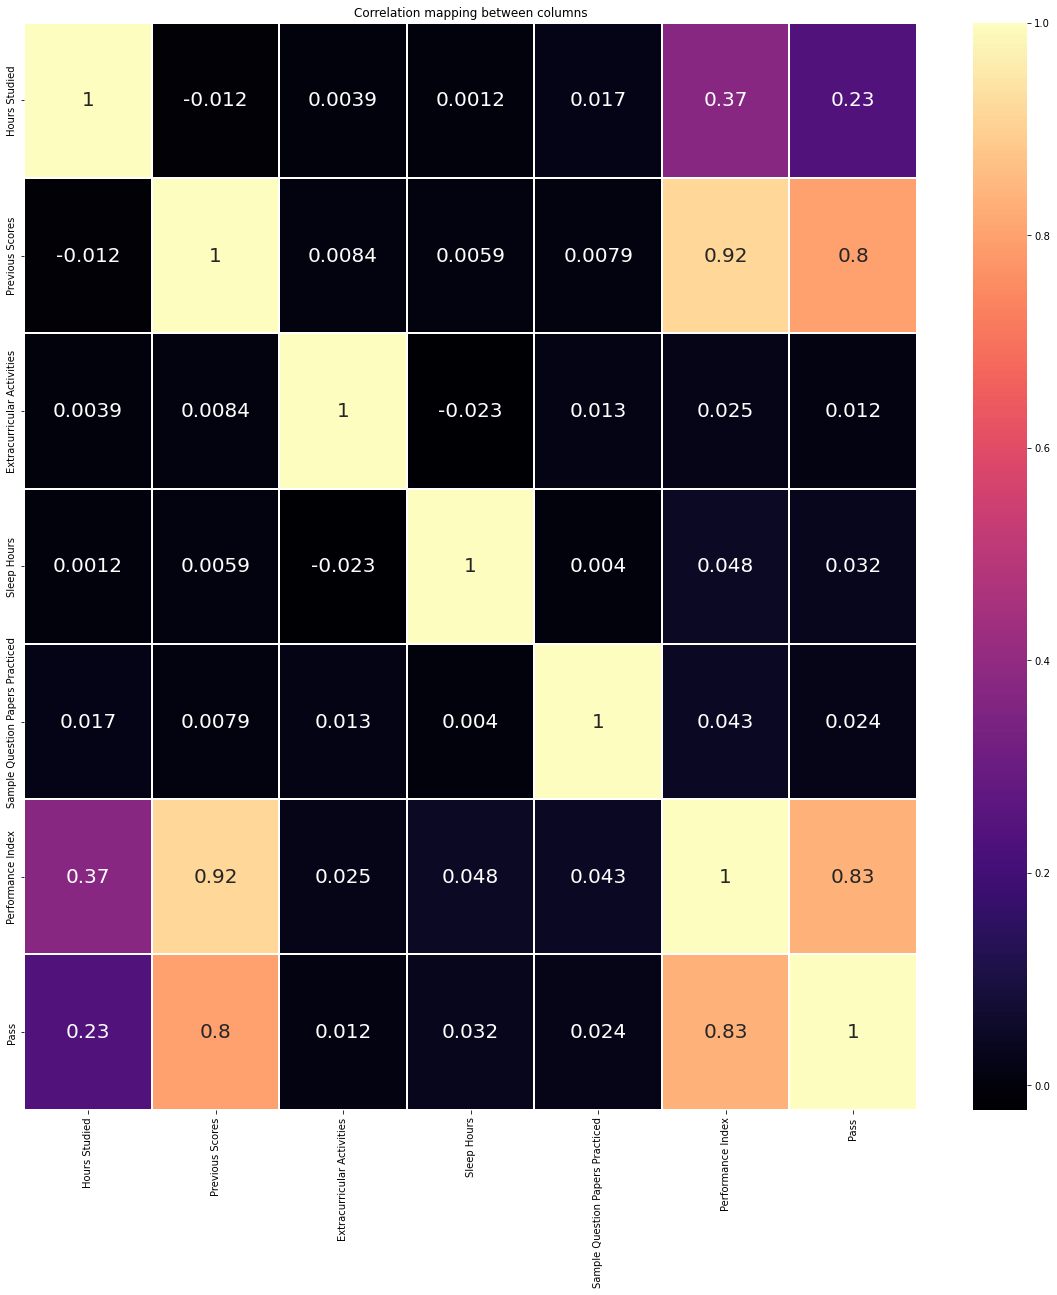

In [327]:
plt.figure(figsize=(20,20))
sns.heatmap(dcorr,annot=True,cmap='magma',linewidths=0.3,annot_kws={'fontsize':20}).set(title='Correlation mapping between columns')
plt.show()

Analysis: Since we derived Pass from Performance Index,the heatmap also shows they have a very high correlation of 0.83. We can see Performance Index has a very high correlation of 0.92 with Previous Scores and 0.8 with Pass. This shows Previous Scores is a very important factor for determining Performance Index and Pass.Apart from that we can see Hours Studied also has some correlation of 0.37 with Performance Index and 0.23 with Pass. This shows Hours Studied can also be used for determining Performance Index and Pass.  

### Clustermap for Correlation between the columns

Text(0.5, 0.98, 'Clustering with Correlation mapping')

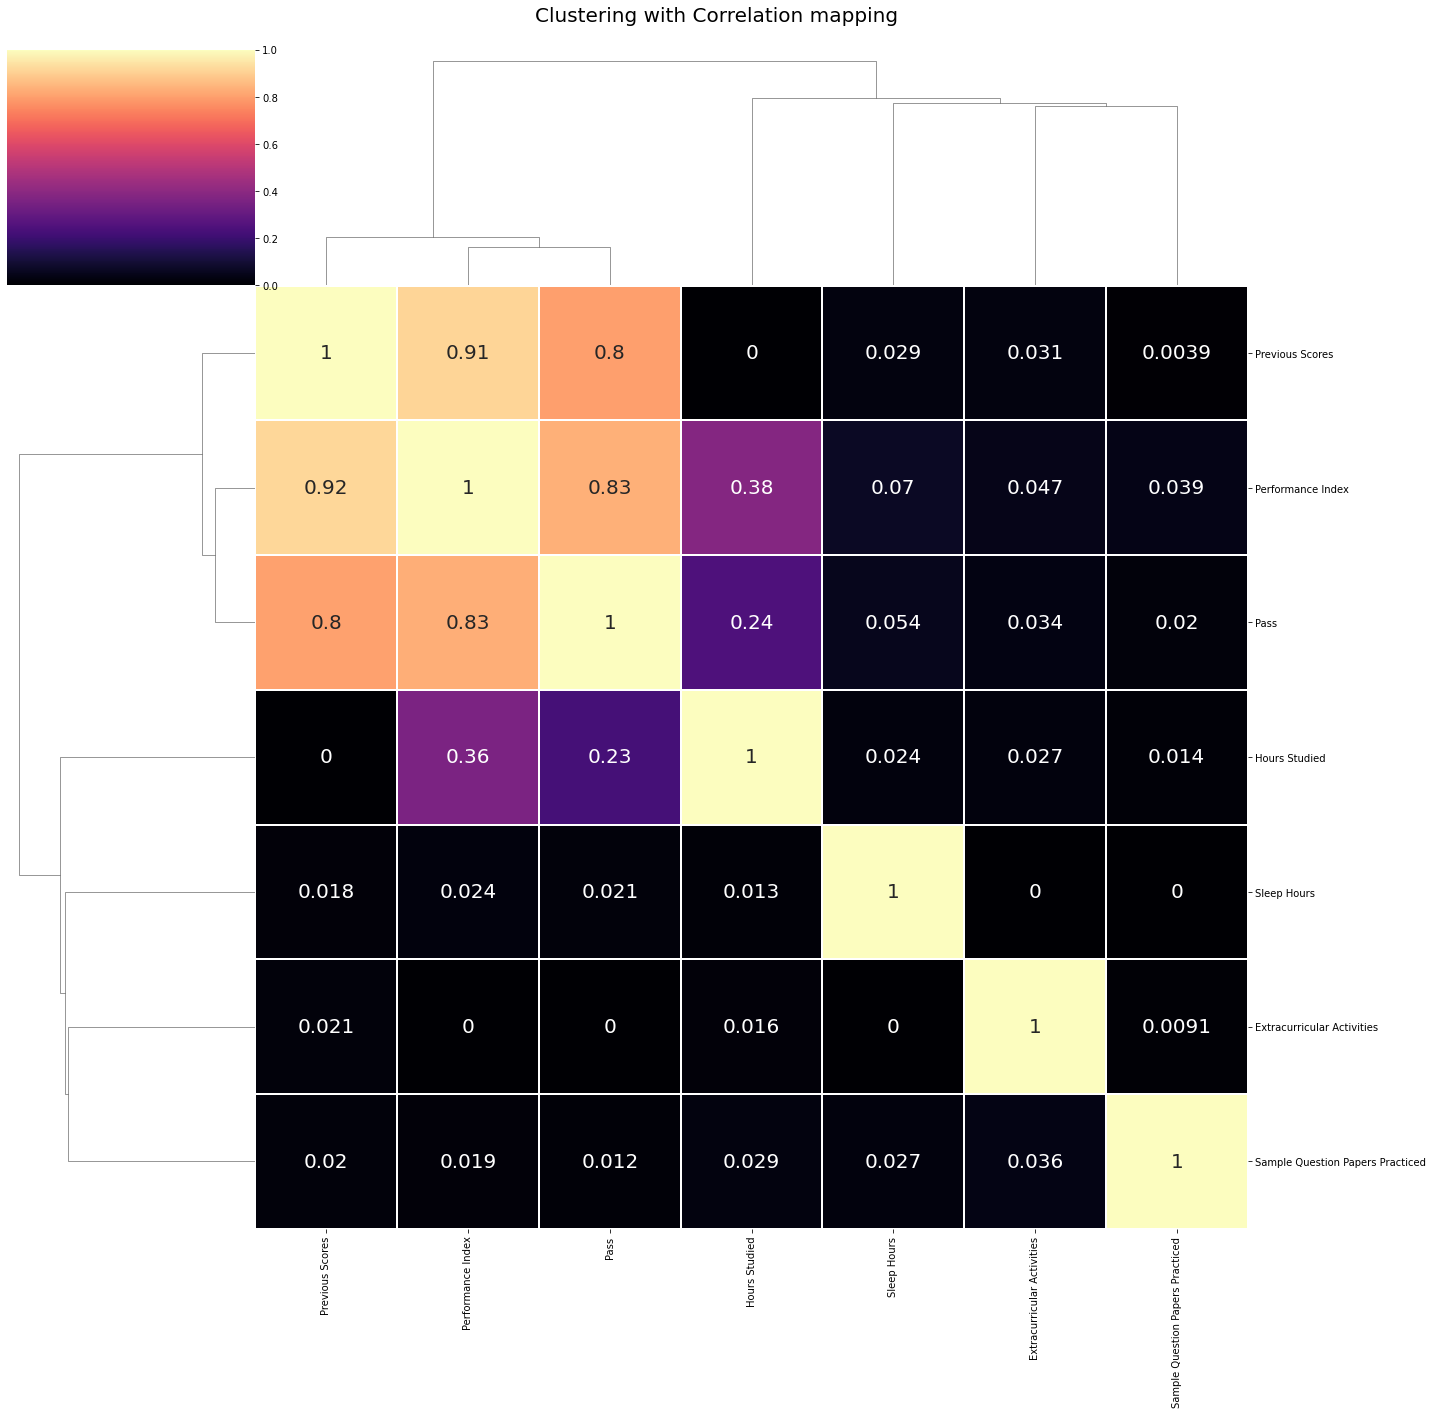

In [328]:
plot = sns.clustermap(dcorr,annot=True,cmap='magma',linewidths=0.3,standard_scale=1,figsize=(20,20),annot_kws={'fontsize':20})
plot.fig.subplots_adjust(top=.95)
plot.fig.suptitle('Clustering with Correlation mapping',size=20)

Analysis: In the previous Analysis, we showed that Previous Scores, Performance index and Pass are highly correlated and now this clustermap further proves that as Previous Scores is clustered with Performance index and Pass cluster. And then Hour Studied is also shown clustered with all three of them which also proves their coorelation in the previous analysis. 

### Pass Correlation with other features - Bar Plot

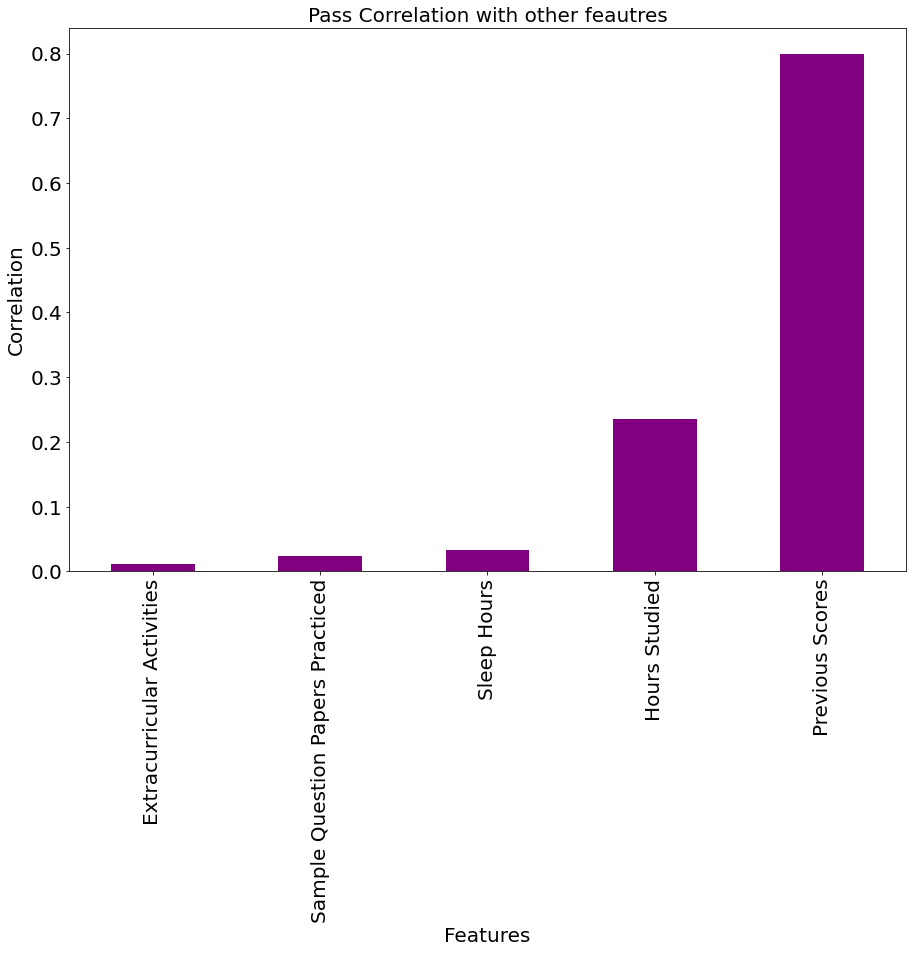

In [329]:
plt.figure(figsize=(15,10))
dcorr['Pass'][:-2].sort_values().plot(kind='bar',color='purple')
plt.title('Pass Correlation with other feautres',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Features',fontdict={'size':20})
plt.ylabel('Correlation',fontdict={'size':20})
plt.show()

Analysis: Since we derived Pass from Performance Index, it has to excluded from the graoh along with Pass itself as we know it will be 1 and is of no use to us. This graph shows that none of the features are negatively correlated with Pass and hence can be used for determining it. Like the previous analysis, it shows Previous Scores is highly correlated and then Hours Studied is to some extent correlated.

### Previous Scores vs Performance Index - Joint Plot

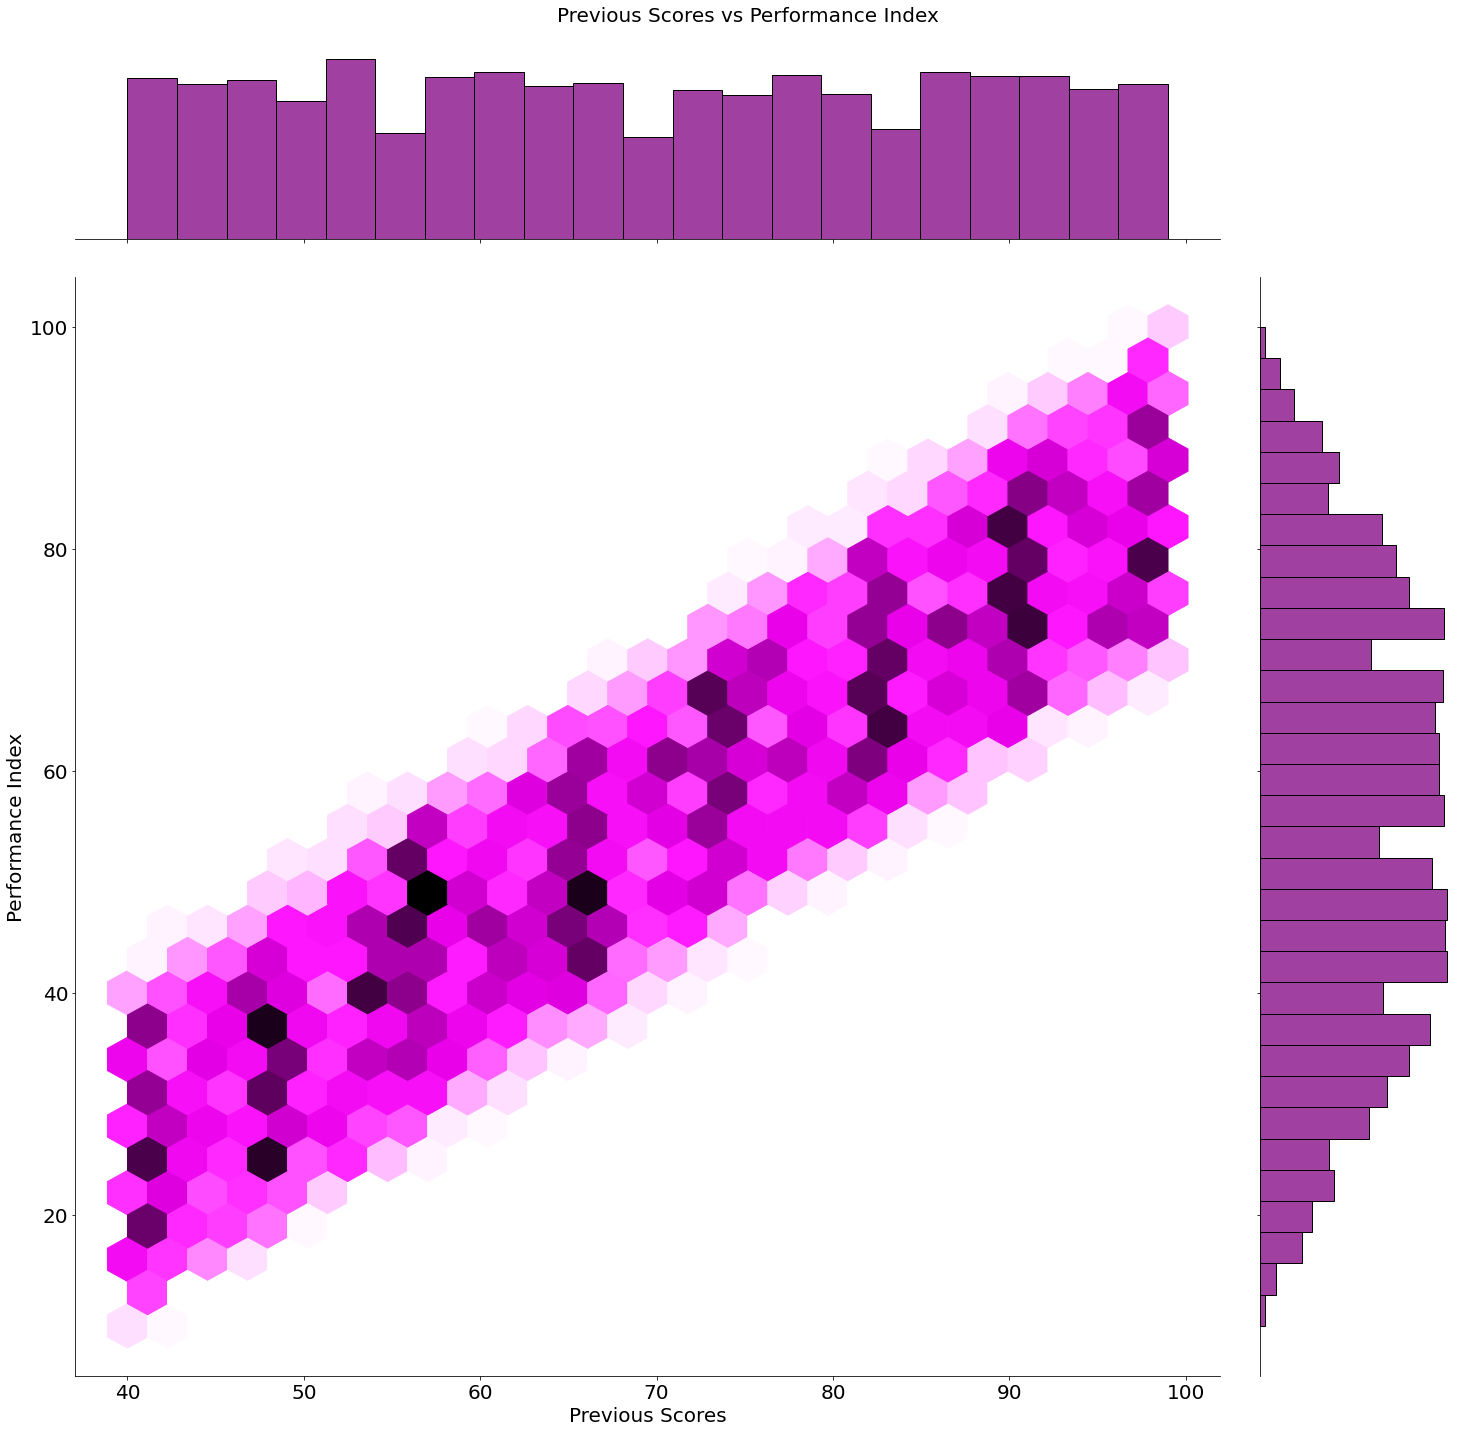

In [330]:
plot=sns.jointplot(x='Previous Scores',y='Performance Index',data=df,color='purple',kind="hex",height=20)
plot.fig.subplots_adjust(top=.95)
plot.fig.suptitle('Previous Scores vs Performance Index',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Previous Scores',fontdict={'size':20})
plt.ylabel('Performance Index',fontdict={'size':20})
plt.show()

Analysis: From the above relation between Previous Scores and Performance Index,we can see that it is directly related with each other. It also shows that the students are not doing a significant upgrade or downgrade from their Previous Scores. For eg if a student has previous score of 70, it's performance index is majorly between 40 and 60 which is not a very significant incline or decline with respect to Performance Index.

### Hours Studied vs Performance Index subdivided by Pass - Bar Plot

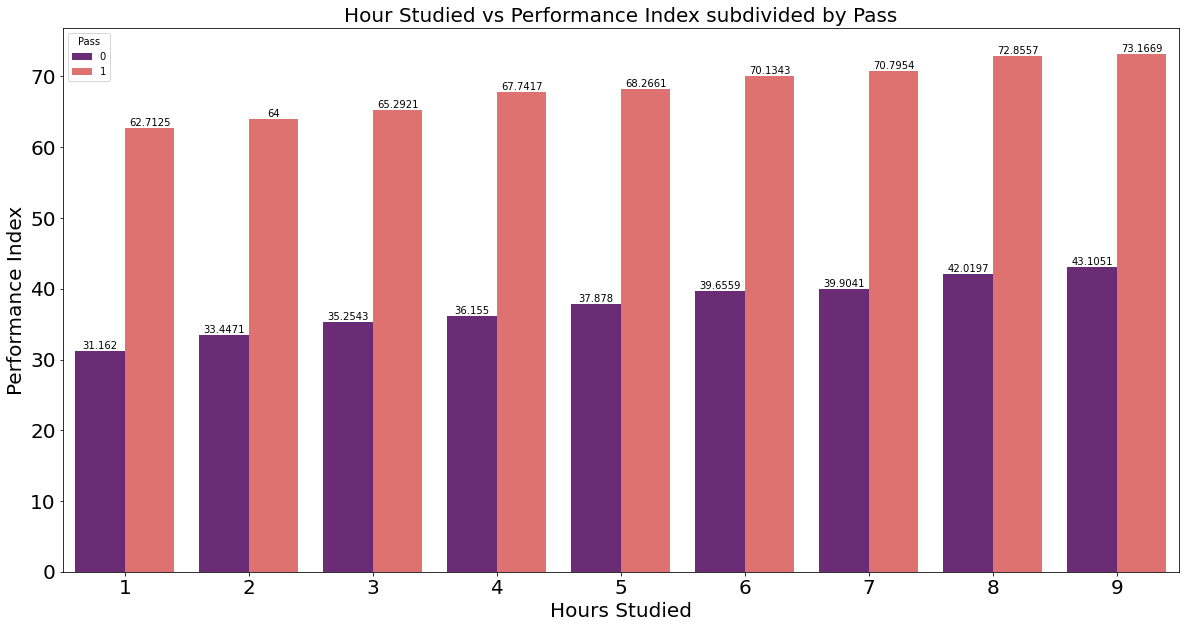

In [331]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='Hours Studied',y='Performance Index',data=df,hue='Pass',palette="magma",ci=None)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Hour Studied vs Performance Index subdivided by Pass',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Hours Studied',fontdict={'size':20})
plt.ylabel('Performance Index',fontdict={'size':20})
plt.show()

Analysis: The following bar plot shows that with increase in hours studied, performance index increases irrespective of  students passes or fails. 

### Sleep Hours vs Performance Index subdivided by Pass - Bar Plot

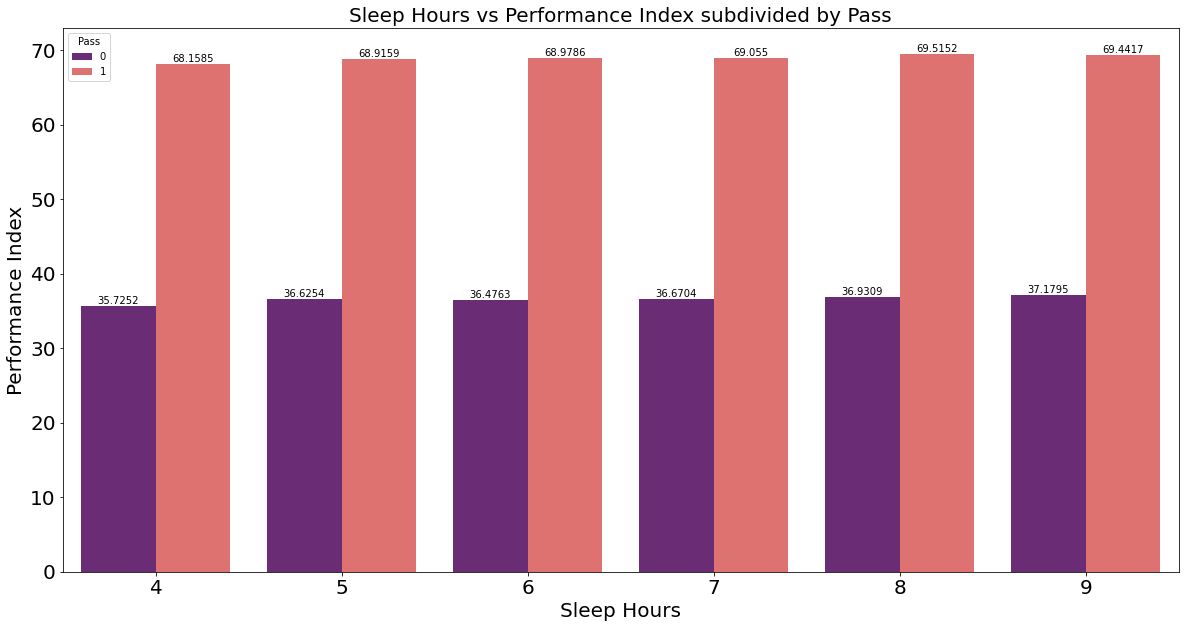

In [332]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='Sleep Hours',y='Performance Index',data=df,hue='Pass',palette="magma",ci=None)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Sleep Hours vs Performance Index subdivided by Pass',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Sleep Hours',fontdict={'size':20})
plt.ylabel('Performance Index',fontdict={'size':20})
plt.show()

Analysis: There is no significant increase in performance index in relation to sleep hours irrespective of Pass or Fail. 

### Sample Question Papers Practiced vs Performance Index subdivided by Pass - Bar Plot

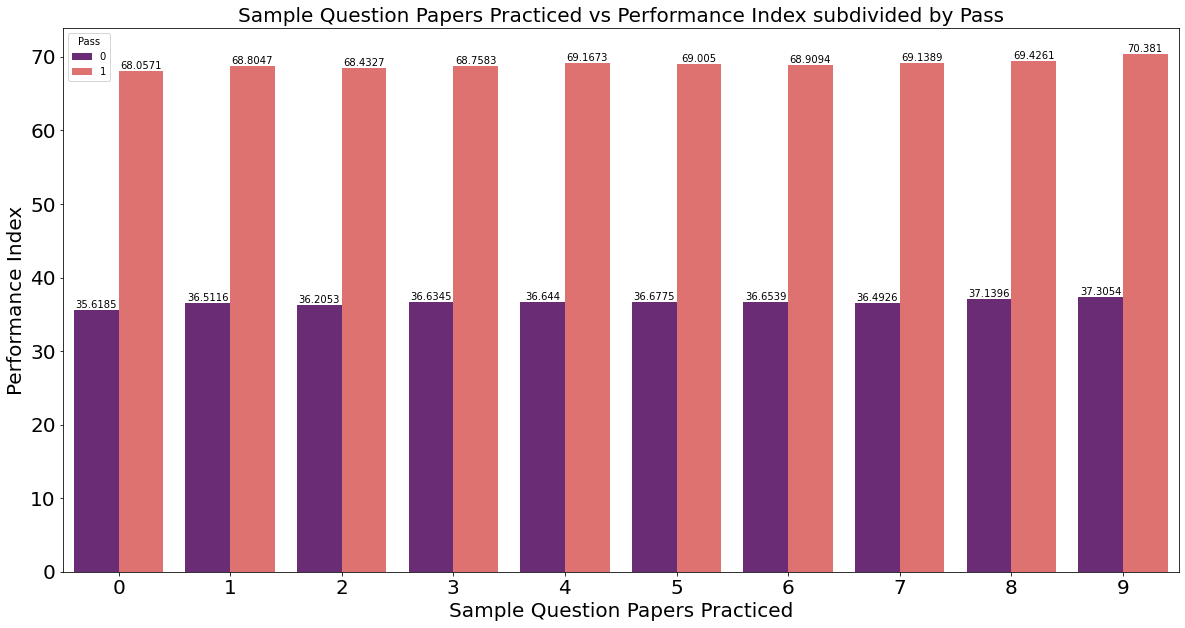

In [333]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='Sample Question Papers Practiced',y='Performance Index',data=df,hue='Pass',palette="magma",ci=None)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Sample Question Papers Practiced vs Performance Index subdivided by Pass',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Sample Question Papers Practiced',fontdict={'size':20})
plt.ylabel('Performance Index',fontdict={'size':20})
plt.show()

Analysis: There is no significant increase in performance index in relation to number of sample question papers practiced irrespective of Pass or Fail. 

### Hours Studied vs Sleep Hours subdivided by Pass - Bar Plot

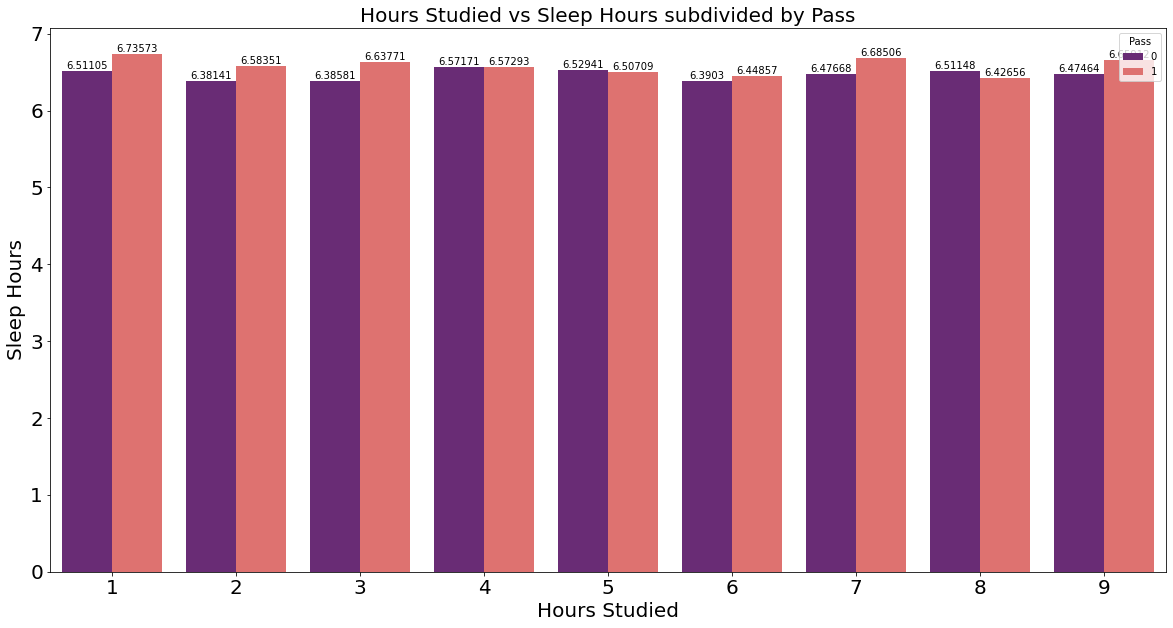

In [334]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='Hours Studied',y='Sleep Hours',data=df,hue='Pass',palette="magma",ci=None)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Hours Studied vs Sleep Hours subdivided by Pass',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Hours Studied',fontdict={'size':20})
plt.ylabel('Sleep Hours',fontdict={'size':20})
plt.show()

Analysis: The following bar plot shows in respect to Hours Studied there is no general trend in Sleep Hours. Usually the student who passes is sleeping more than student who fails at the same amount of hours studied except for the students who are studying for 5 hours and 8 hours. 

### Sleep Hours vs Hours Studied subdivided by Pass - Bar Plot

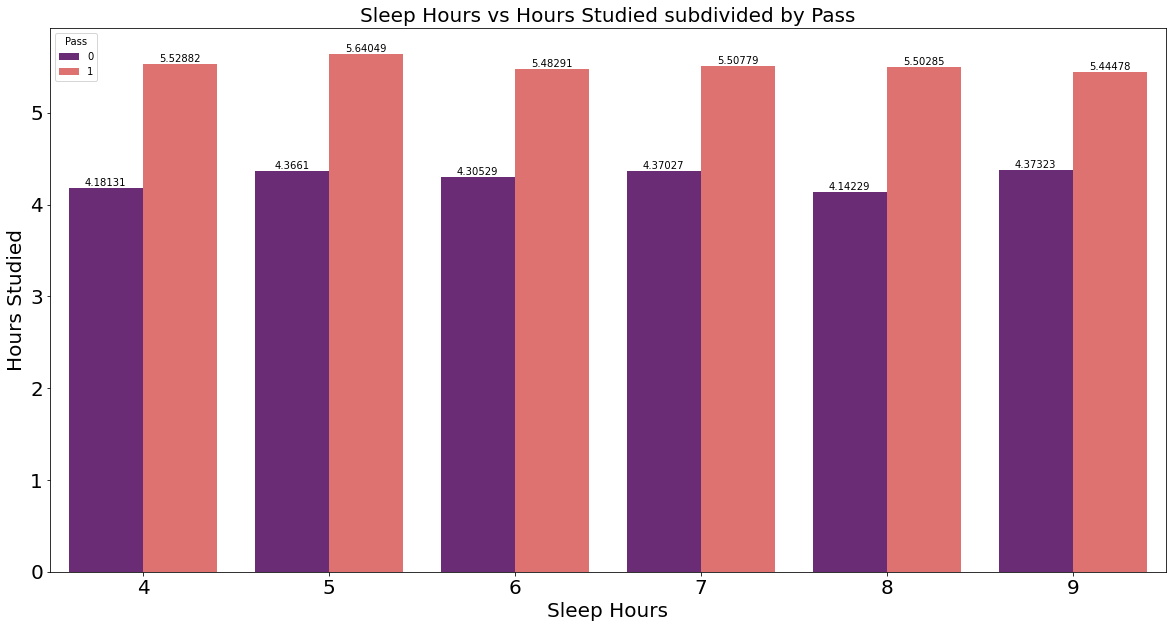

In [335]:
plt.figure(figsize=(20,10))
ax=sns.barplot(x='Sleep Hours',y='Hours Studied',data=df,hue='Pass',palette="magma",ci=None)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Sleep Hours vs Hours Studied subdivided by Pass',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Sleep Hours',fontdict={'size':20})
plt.ylabel('Hours Studied',fontdict={'size':20})
plt.show()

Analysis: The following bar plot shows that the passed student have more hours studied at the same amount of sleep hours than a failed student. There is no significant trend in Hours Studied with respect to Sleep hour. 

### Extracurricular Activities vs Frequency subdivided by Pass - Bar Plot

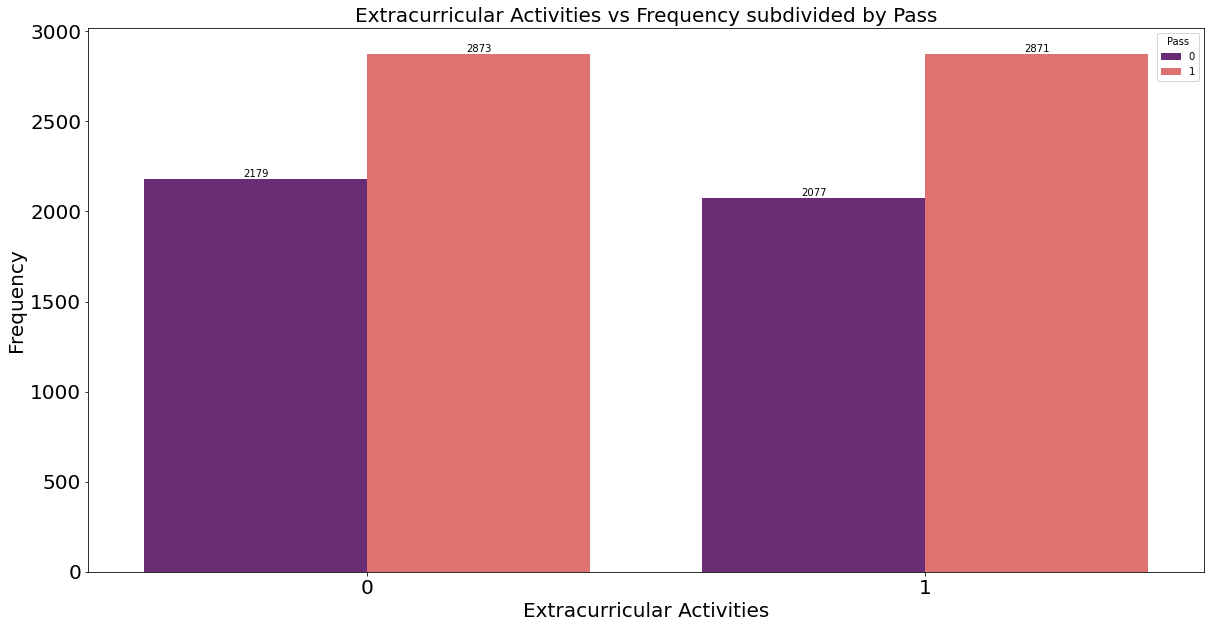

In [336]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Extracurricular Activities',data=df,hue='Pass',palette="magma")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Extracurricular Activities vs Frequency subdivided by Pass',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Extracurricular Activities',fontdict={'size':20})
plt.ylabel('Frequency',fontdict={'size':20})
plt.show()

Analysis: The following bar plot shows that student's Extracurricular Activities has no relation to whether they are passing pr failing.There are more passed students than failed students in both who are doing extracurricular activities and who are not doing extracurricular activities.

### Hours Studied vs Frequency subdivided by Pass - Bar Plot 

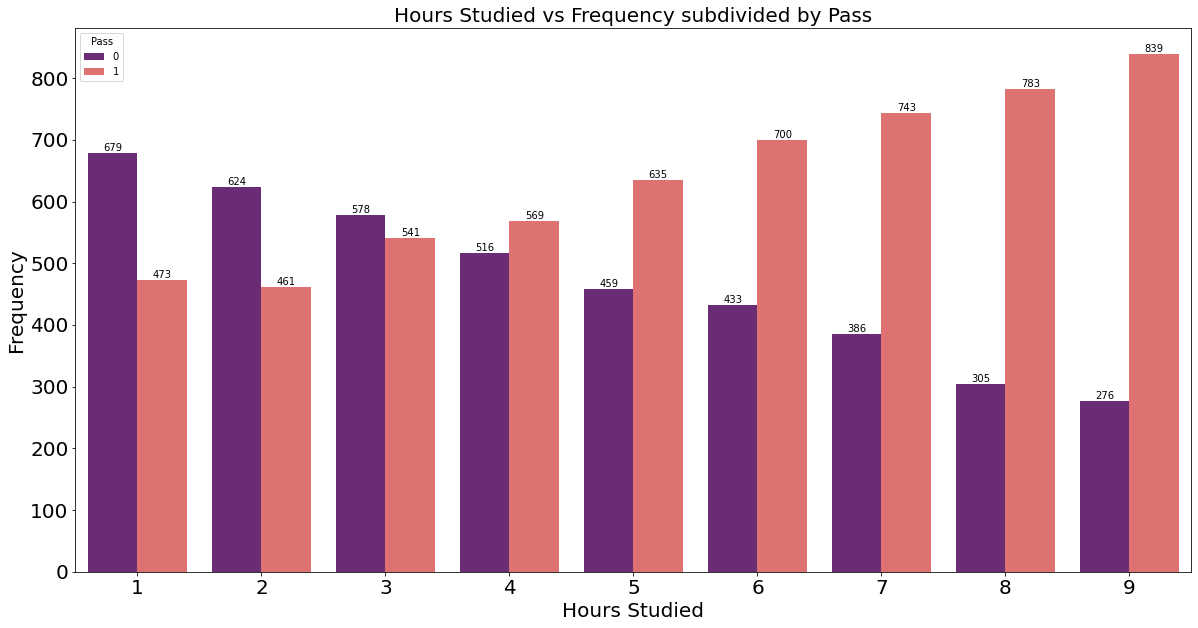

In [337]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Hours Studied',data=df,hue='Pass',palette="magma")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Hours Studied vs Frequency subdivided by Pass',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Hours Studied',fontdict={'size':20})
plt.ylabel('Frequency',fontdict={'size':20})
plt.show()

Analysis: The following bar plot shows that there are more students with less hours studies failing than passing and with high hours studies passing than failing. There are more students who are studying 1 to 3 hours failing that passing. This proves the correlation of Hours Studied being a important factor for determining whether a student Passes or Fails. 

### Sleep Hours vs Frequency subdivided by Pass - Bar Plot 

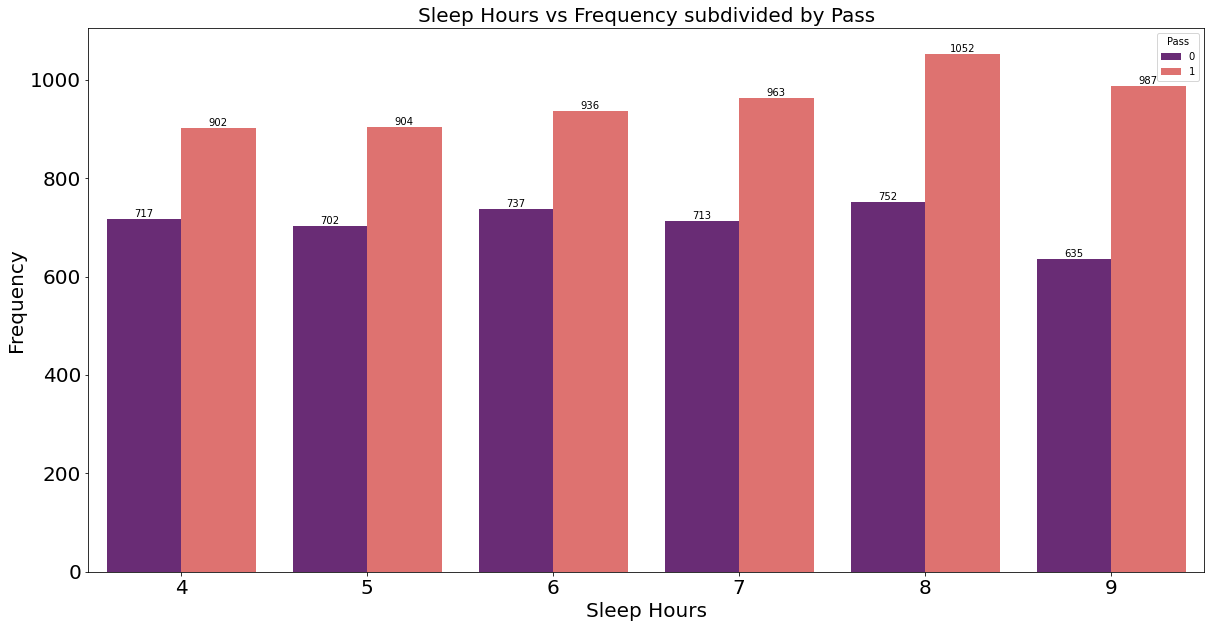

In [338]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Sleep Hours',data=df,hue='Pass',palette="magma")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Sleep Hours vs Frequency subdivided by Pass',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Sleep Hours',fontdict={'size':20})
plt.ylabel('Frequency',fontdict={'size':20})
plt.show()

Analysis: The following bar plot shows that there are most students are sleeping 8 hours but there is no significant trend between the sleep hours in respect to Passing or failing.  

### Sample Question Papers Practiced vs Frequency subdivided by Pass - Bar Plot

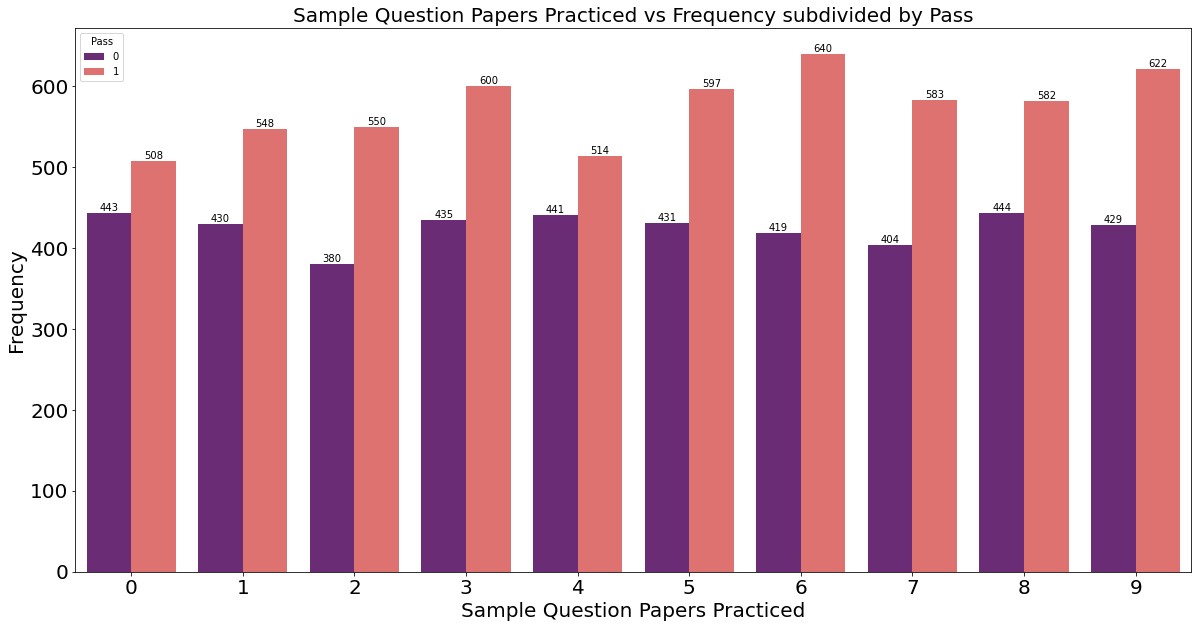

In [339]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Sample Question Papers Practiced',data=df,hue='Pass',palette="magma")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Sample Question Papers Practiced vs Frequency subdivided by Pass',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Sample Question Papers Practiced',fontdict={'size':20})
plt.ylabel('Frequency',fontdict={'size':20})
plt.show()

Analysis: The following bar plot shows no significant relation in how many question papers are being practiced by majority of students and how it is trending with respect to Passing as there are more students passed than failed in any number of question papers practiced. 

All the Linear Regression Plots will come into use in the implementation of Linear Regression Model.

### Linear Regression Plot on Hours Studied vs Performance Index

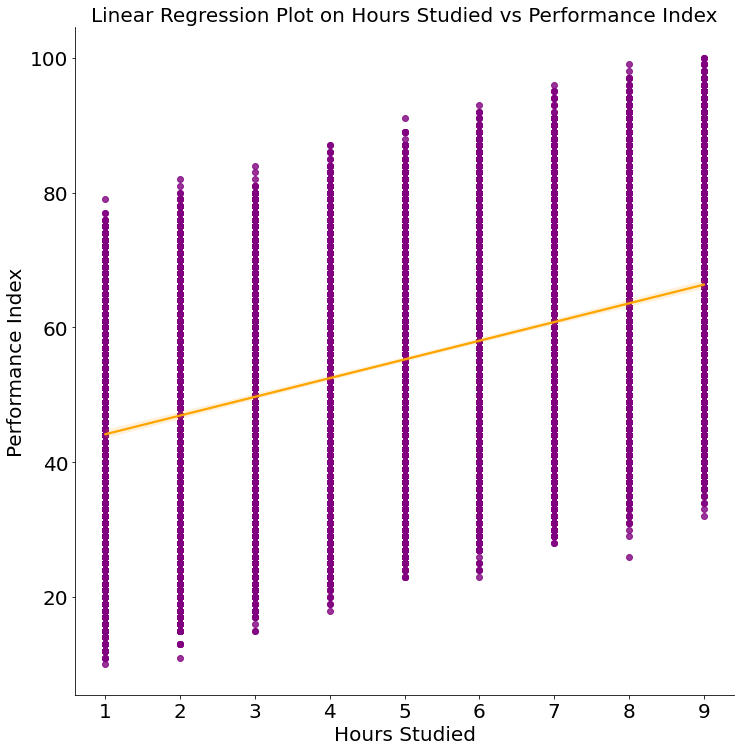

In [340]:
sns.lmplot(x="Hours Studied",y="Performance Index",data=df,scatter_kws={"color": "purple"},line_kws={'color': 'orange'},height=10)
plt.title('Linear Regression Plot on Hours Studied vs Performance Index',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Hours Studied',fontdict={'size':20})
plt.ylabel('Performance Index',fontdict={'size':20})
plt.show()

### Linear Regression Plot on Previous Scores vs Performance Index

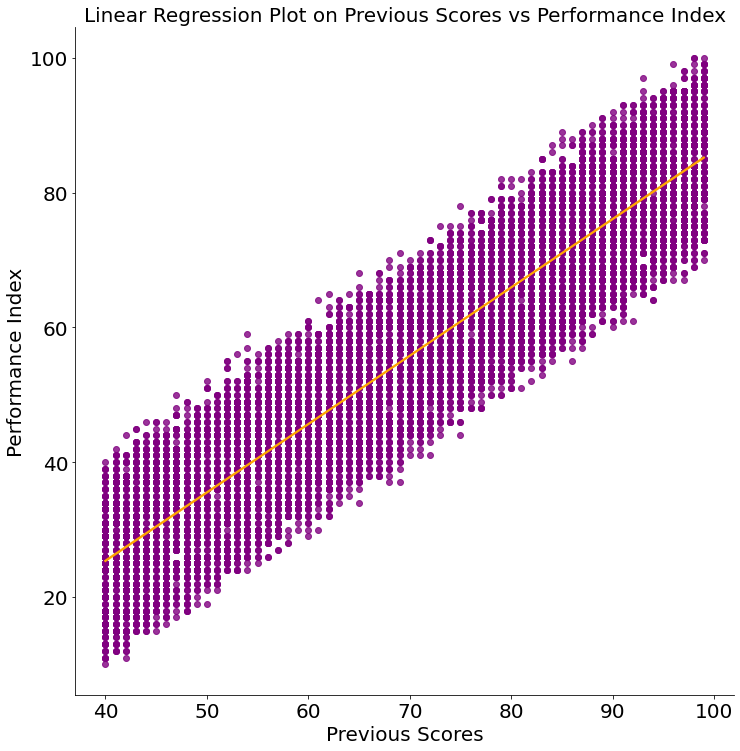

In [341]:
sns.lmplot(x="Previous Scores",y="Performance Index",data=df,scatter_kws={"color": "purple"},line_kws={'color': 'orange'},height=10)
plt.title('Linear Regression Plot on Previous Scores vs Performance Index',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Previous Scores',fontdict={'size':20})
plt.ylabel('Performance Index',fontdict={'size':20})
plt.show()

### Linear Regression Plot on Extracurricular Activities vs Performance Index

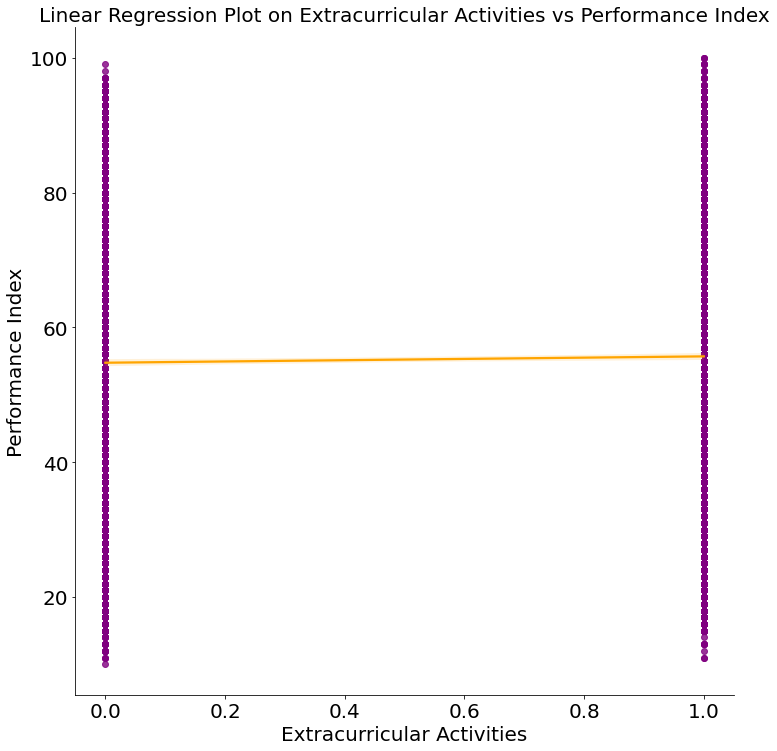

In [342]:
sns.lmplot(x="Extracurricular Activities",y="Performance Index",data=df,scatter_kws={"color": "purple"},line_kws={'color': 'orange'},height=10)
plt.title('Linear Regression Plot on Extracurricular Activities vs Performance Index',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Extracurricular Activities',fontdict={'size':20})
plt.ylabel('Performance Index',fontdict={'size':20})
plt.show()

### Linear Regression Plot on Sleep Hours vs Performance Index

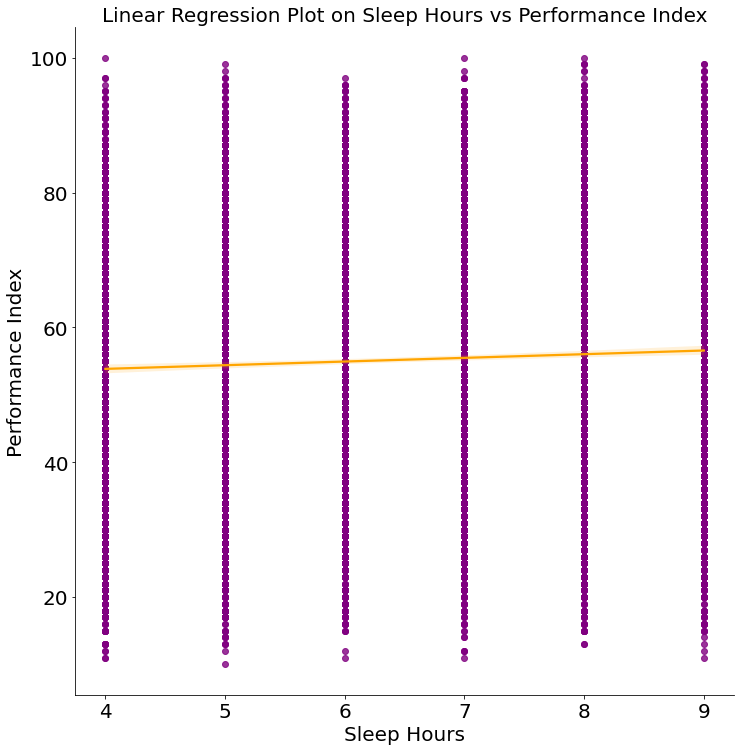

In [343]:
sns.lmplot(x="Sleep Hours",y="Performance Index",data=df,scatter_kws={"color": "purple"},line_kws={'color': 'orange'},height=10)
plt.title('Linear Regression Plot on Sleep Hours vs Performance Index',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Sleep Hours',fontdict={'size':20})
plt.ylabel('Performance Index',fontdict={'size':20})
plt.show()

### Linear Regression Plot on Sample Question Papers Practiced vs Performance Index

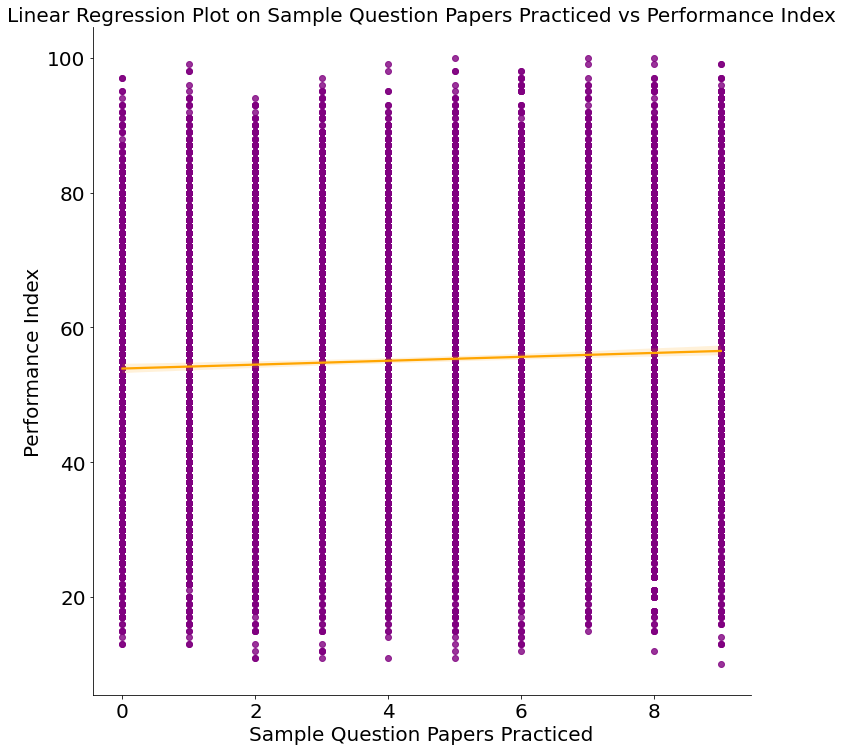

In [344]:
sns.lmplot(x="Sample Question Papers Practiced",y="Performance Index",data=df,scatter_kws={"color": "purple"},line_kws={'color': 'orange'},height=10)
plt.title('Linear Regression Plot on Sample Question Papers Practiced vs Performance Index',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Sample Question Papers Practiced',fontdict={'size':20})
plt.ylabel('Performance Index',fontdict={'size':20})
plt.show()

## Machine Learning

### Importing Train_Test_Split Library

In [345]:
from sklearn.model_selection import train_test_split

### Linear Regression

#### Importing Linear Regression library

In [346]:
from sklearn.linear_model import LinearRegression

#### Train Test Split according to Performance Index

In [347]:
X=df.drop(['Performance Index','Pass'],axis=1)
Y=df['Performance Index']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=124)

#### Initialising the model

In [348]:
lm=LinearRegression()

#### Fitting our training data into the model

In [349]:
lm.fit(X_train,y_train)

LinearRegression()

#### Taking predictions for our test data

In [350]:
predictions=lm.predict(X_test)

#### Printing intercept of the linear regression line of our train data

In [351]:
print('Intercept:',lm.intercept_)

Intercept: -34.12869949494894


#### Printing coefficients of the linear regression line of our train data

In [352]:
print('Coefficient:',lm.coef_)

Coefficient: [2.85467888 1.0192015  0.60367678 0.4768677  0.1979086 ]


Note: Since train data is a 70% of our main data, the lines plotted by calculated by these coefficients and intercept may variate with the linear regression plotted above but would be very similar for specific features like Hours Studied and Previous Scores as they are very correlated with Performance Index.

#### Printing Linear Regression Score

In [353]:
print('Score:',lm.score(X_test,y_test))

Score: 0.9886919364491018


Note: Since our score is almost 99%, the data is perfectly fit into the model

#### Importing metrics library

In [354]:
from sklearn import metrics

#### Printing Mean Absolute Error

In [355]:
mae=metrics.mean_absolute_error(y_test,predictions)
print("Mean Absolute error:",mae)

Mean Absolute error: 1.6155582660816308


#### Printing Mean Squared Error

In [356]:
mse=metrics.mean_squared_error(y_test,predictions)
print("Mean Squared error:",mse)

Mean Squared error: 4.111158316804983


#### Printing Root Mean Squared Error

In [357]:
rmse=mse**0.5
print("Root Mean Squared error:",rmse)

Root Mean Squared error: 2.0275991509183915


Note: Since our Mean Absolute Error is approximately 2% of our data and Root Mean Squared Error is also 2%, our Linear Regression model has been successfully implemented on our data.

### Logistic Regression

#### Importing Logistic Regression Library

In [358]:
from sklearn.linear_model import LogisticRegression

#### Train Test Split according to Pass

In [359]:
X=df.drop(['Performance Index','Pass'],axis=1)
Y=df['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=124)

#### Initialising the model

In [360]:
lg=LogisticRegression()

#### Fitting our train data into the model

In [361]:
lg.fit(X_train,y_train)

LogisticRegression()

#### Taking predictions for our test data

In [362]:
predictions=lg.predict(X_test)

#### Printing Logistic Regression Score

In [363]:
print('Score:',lg.score(X_test,y_test))

Score: 0.974


Note: Since the score is approximately 98%, our data is perfectly fit into the model. 

#### Importing library for classification report and confusion matrix 

In [364]:
from sklearn.metrics import classification_report,confusion_matrix

#### Printing confusion matrix to compare our predictions with actual results of test data

In [365]:
print(confusion_matrix(y_test,predictions))

[[1271   37]
 [  41 1651]]


#### Printing the classification report of our model implemented on the data

In [366]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1308
           1       0.98      0.98      0.98      1692

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



Note: Since our f1-score is 98% accurate, our Logistic Regression model has been successfully implemented on our data.

### Decision Tree Classifier

#### Importing Decision Tree Classifier Library

In [367]:
from sklearn.tree import DecisionTreeClassifier

#### Initialising the model

In [368]:
dt=DecisionTreeClassifier()

#### Fitting our training data into the model

In [369]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

#### Taking prediction from our model for the test data

In [370]:
predictions=dt.predict(X_test)

#### Printing Decision Tree Classifier Score

In [371]:
print('Score:',dt.score(X_test,y_test))

Score: 0.9653333333333334


Note: Since the score is approximately 97%, our data is perfectly fit into the model.

#### Printing confusion matrix to compare our predictions with actual results of test data

In [372]:
print(confusion_matrix(y_test,predictions))

[[1258   50]
 [  54 1638]]


#### Printing the classification report of our model implemented on the data

In [373]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1308
           1       0.97      0.97      0.97      1692

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



Note: Since our f1-score is 97% accurate, our Decision Tree Classifier model has been successfully implemented on our data.

### Random Forest Classifier

### Importing Random Forest Classifier Library

In [374]:
from sklearn.ensemble import RandomForestClassifier

#### Initialising the model for 200 Decision Trees

In [375]:
rfc=RandomForestClassifier(n_estimators=200)

#### Fitting our training data into the model

In [376]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

#### Taking predictions for our test data from the model

In [377]:
predictions=rfc.predict(X_test)

#### Printing Random Forest Classifier Score

In [378]:
print('Score:',rfc.score(X_test,y_test))

Score: 0.9736666666666667


Note: Since the score is approximately 98%, our data is perfectly fit into the model.

#### Printing confusion matrix to compare our predictions with actual results of test data

In [379]:
print(confusion_matrix(y_test,predictions))

[[1274   34]
 [  45 1647]]


#### Printing the classification report of our model implemented on the data

In [380]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1308
           1       0.98      0.97      0.98      1692

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



Note: Since our f1-score is 98% accurate, our Random Forest Classifier model has been successfully implemented on our data.

### Support Vector Machine

#### Importing Support Vector Machine Library

In [381]:
from sklearn.svm import SVC

#### Initialising the model

In [382]:
sp=SVC()

#### Fitting our training data into the model

In [383]:
sp.fit(X_train,y_train)

SVC()

#### Taking Prediction for our test data from the model

In [384]:
predictions=sp.predict(X_test)

#### Printing Support Vector Machine Score

In [385]:
print('Score:',sp.score(X_test,y_test))

Score: 0.9653333333333334


Note: Since the score is approximately 97%, our data is perfectly fit into the model.

#### Printing confusion matrix to compare our predictions with actual results of test data

In [386]:
print(confusion_matrix(y_test,predictions))

[[1258   50]
 [  54 1638]]


#### Printing the classification report of our model implemented on the data

In [387]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1308
           1       0.97      0.97      0.97      1692

    accuracy                           0.97      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



Note: Since our f1-score is 97% accurate, our Support Vector Machine model has been successfully implemented on our data but it can be improved so we will implement Grid Search to improve the accuracy.

#### Importing Grid Search CV library

In [388]:
from sklearn.model_selection import GridSearchCV

#### Initialising Cost and Gamma to find appropriate fit for the model

In [389]:
param_grid={'C':[0.1,1,10],'gamma':[1,0.1,0.01]}

#### Initialising the model and finding the correct Cost and Gamma that fits the model based on training data

In [390]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .....................................C=0.1, gamma=1; total time=   2.8s
[CV] END .....................................C=0.1, gamma=1; total time=   2.6s
[CV] END .....................................C=0.1, gamma=1; total time=   2.5s
[CV] END .....................................C=0.1, gamma=1; total time=   2.5s
[CV] END .....................................C=0.1, gamma=1; total time=   2.4s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.6s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.6s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.2s
[CV] END ..................................C=0.1,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01]},
             verbose=2)

#### Printing the best Cost and Gamma value for the model

In [391]:
print(grid.best_estimator_)

SVC(C=1, gamma=0.01)


#### Taking predictions for our test data from the model

In [392]:
predictions=grid.predict(X_test)

#### Printing the New Support Vector Machine Score

In [393]:
print('Score:',grid.score(X_test,y_test))

Score: 0.9743333333333334


Note: Since our scores have improved from approximately 97% to approximately 98%, our data is now more fit into the model.

#### Printing confusion matrix to compare our predictions with actual results of test data

In [394]:
print(confusion_matrix(y_test,predictions))

[[1273   35]
 [  42 1650]]


#### Printing the classification report of our model implemented on the data

In [395]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1308
           1       0.98      0.98      0.98      1692

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



Note: Since our f1-score is now 97% accurate, our Support Vector Machine model has been more successfully implemented on our data.

### K-Means Clustering

#### Previous Scores vs Performance Index-Scatter Plot

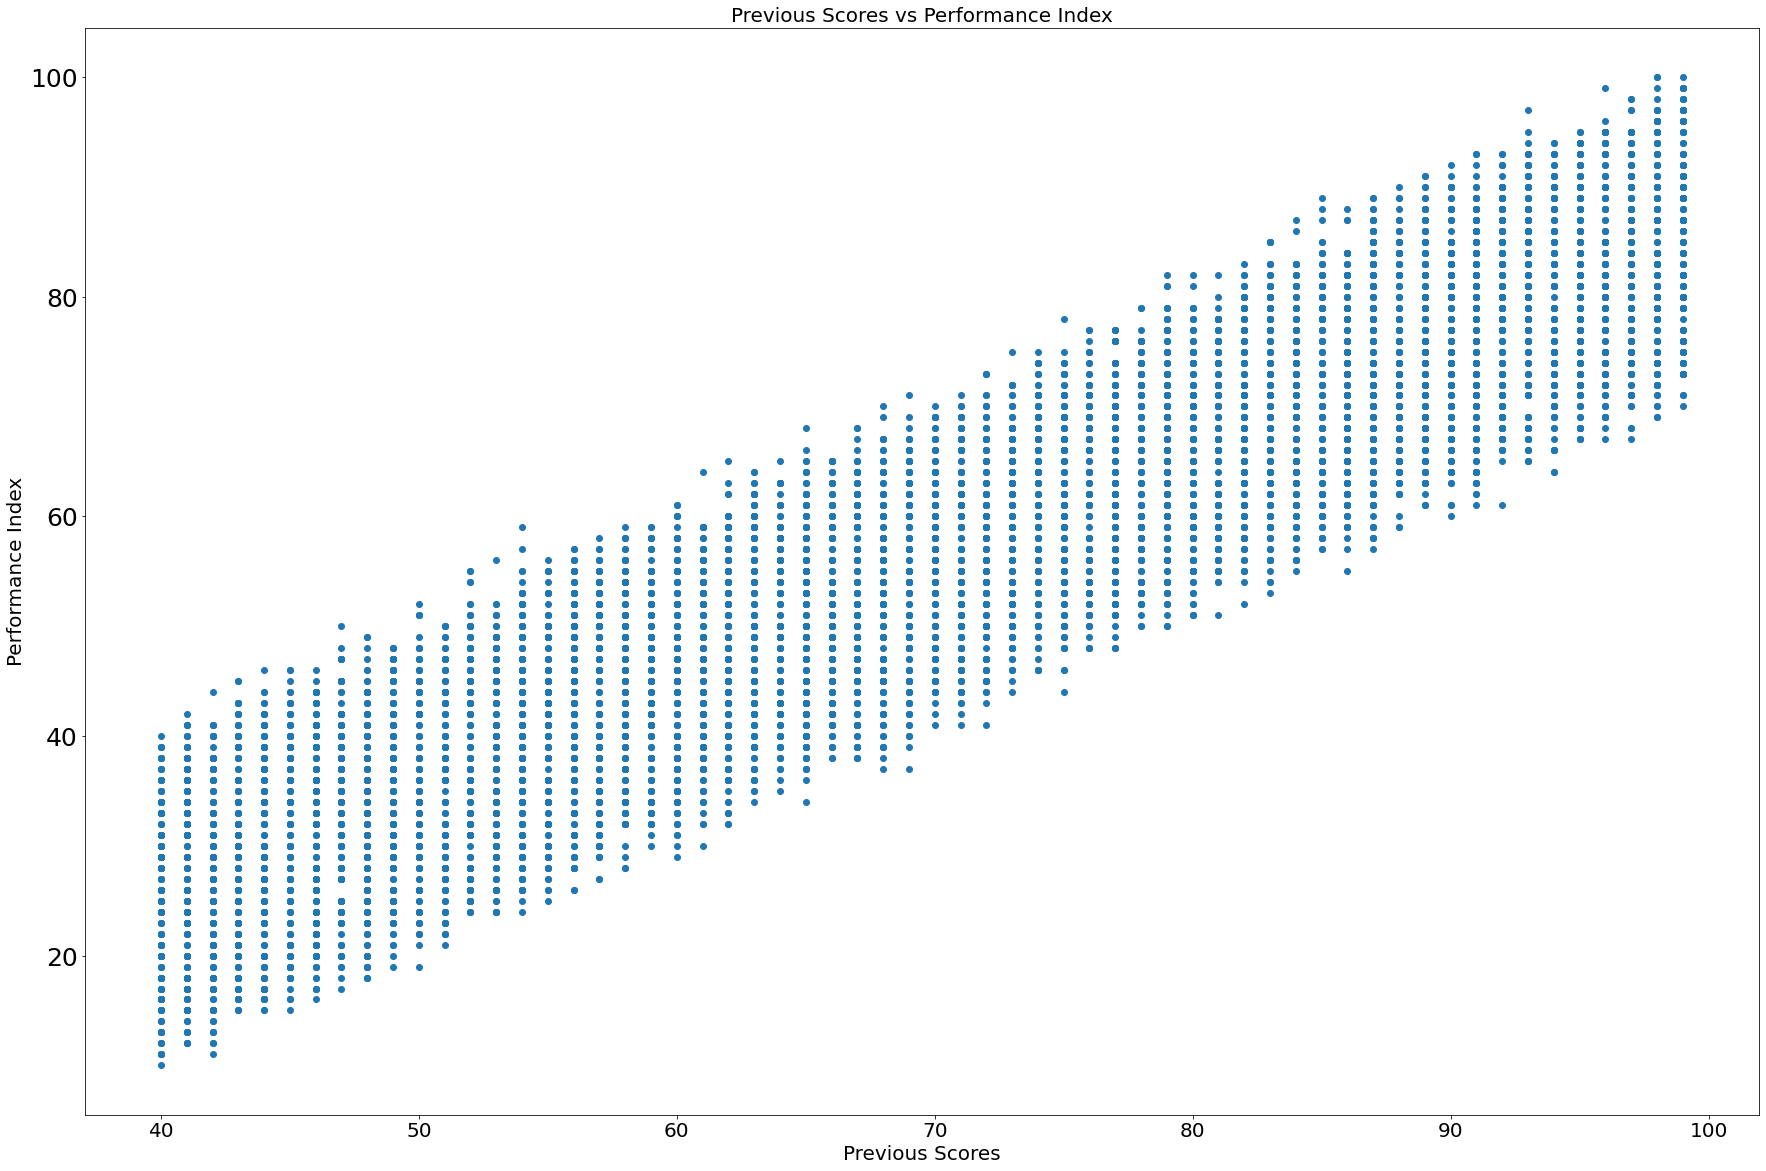

In [396]:
plt.figure(figsize=(30,20))
plt.scatter(df['Previous Scores'],df['Performance Index'])
plt.xlabel('Previous Scores',fontdict={'size':20})
plt.ylabel('Performance Index',fontdict={'size':20})
plt.title('Previous Scores vs Performance Index',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.show()

Note: Here we will try to find how we can divide the above scatter into most similar clusters.

#### Importing K means clustering library

In [397]:
from sklearn.cluster import KMeans

#### Initialising the model with 2 clusters

In [398]:
kmeans=KMeans(n_clusters=2)

#### Fitting our training data into the model and predicting the center of clusters 

In [399]:
cl=kmeans.fit_predict(df[['Previous Scores','Performance Index']])

#### Printing the centers

In [400]:
center=kmeans.cluster_centers_
print(center)

[[84.42669363 71.40889788]
 [54.79070227 39.39287834]]


#### Creating another dataset to show which row belongs to which cluster without harming original data

In [401]:
dfle=df
dfle['cluster']=cl
dfle.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Pass,cluster
0,7,99,1,9,1,91.0,1,0
1,4,82,0,4,2,65.0,1,0
2,8,51,1,7,2,45.0,0,1
3,5,52,1,5,2,36.0,0,1
4,7,75,0,8,5,66.0,1,0


#### Previous Scores vs Performance Index-Scatter Plot with 2 clusters

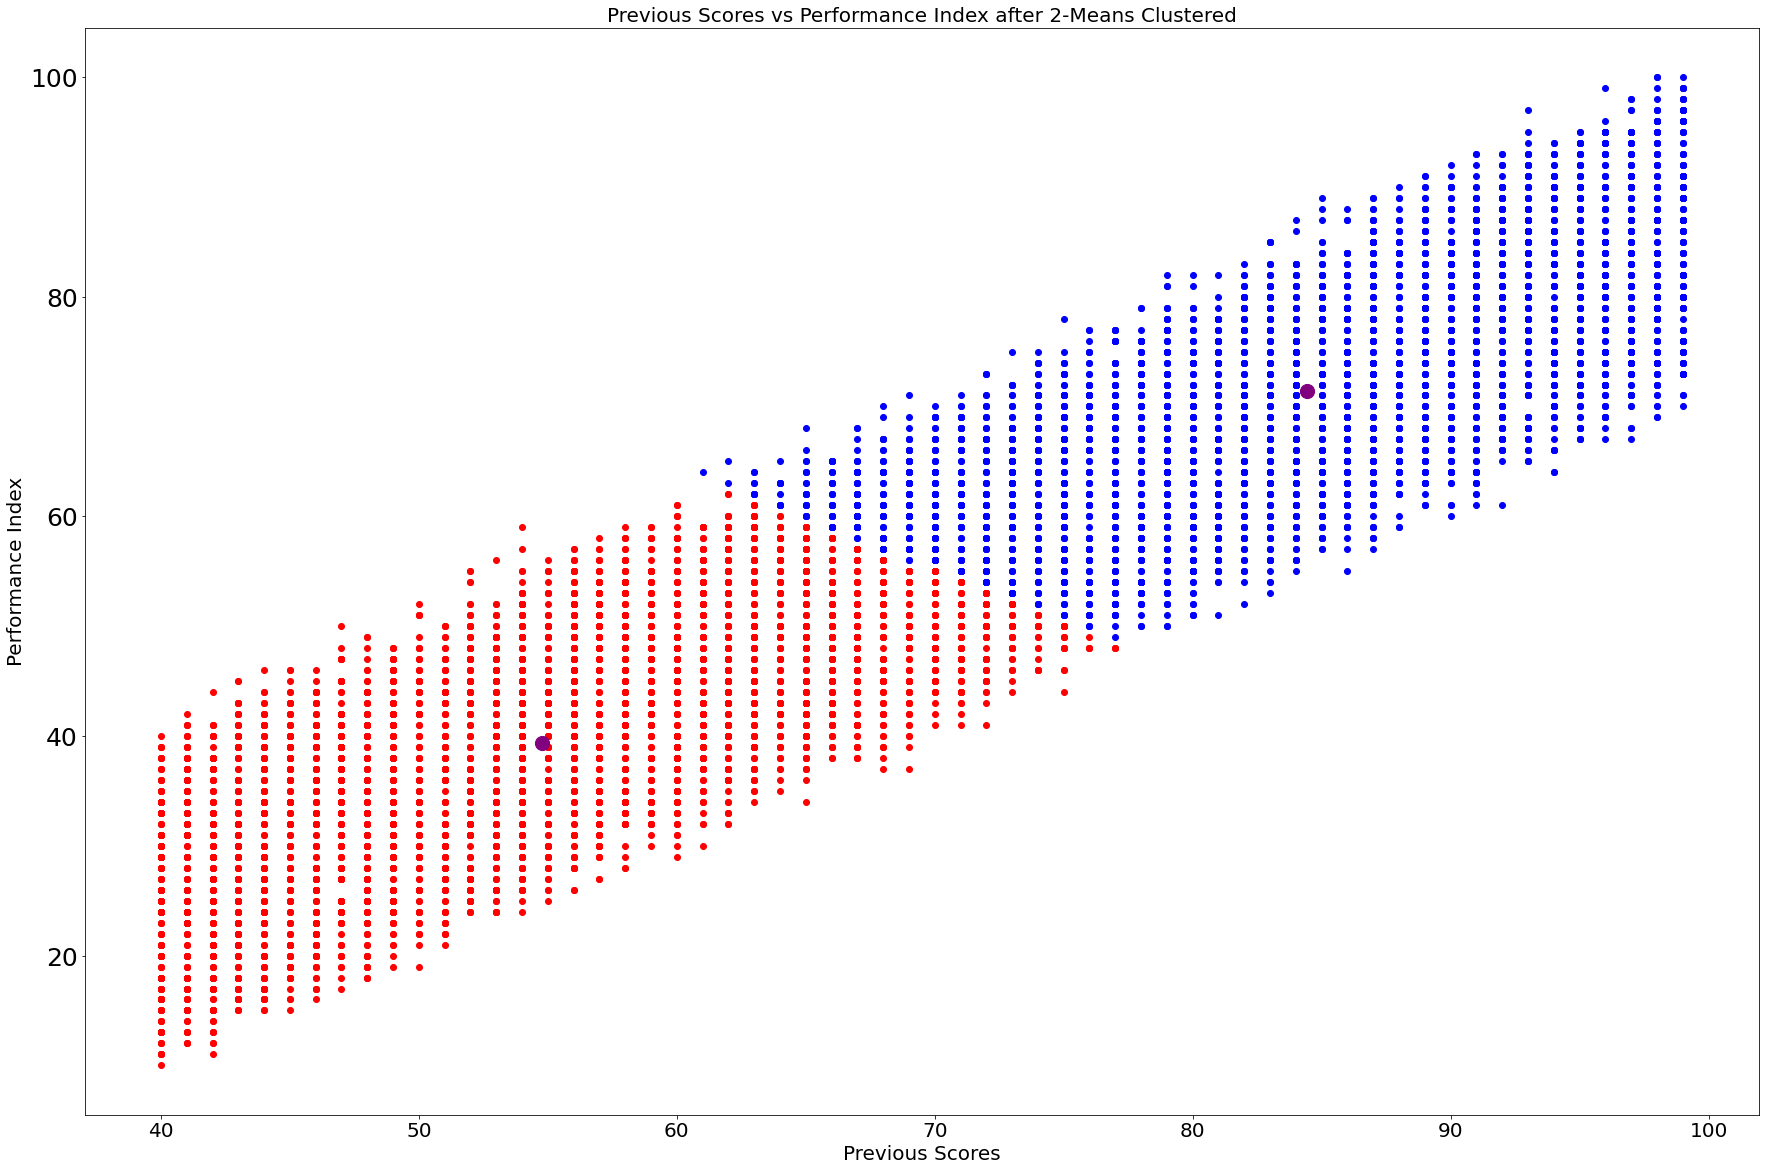

In [402]:
plt.figure(figsize=(30,20))
df1=dfle[dfle['cluster']==0]
df2=dfle[dfle['cluster']==1]
plt.scatter(df1['Previous Scores'],df1['Performance Index'],color='b')
plt.scatter(df2['Previous Scores'],df2['Performance Index'],color='r')
plt.scatter(center[:,0],center[:,1],color='purple',marker='o',label='centroid',s=200)
plt.xlabel('Previous Scores',fontdict={'size':20})
plt.ylabel('Performance Index',fontdict={'size':20})
plt.title('Previous Scores vs Performance Index after 2-Means Clustered',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.show()

Note: The following scatter plot is divided into two clusters- red cluster and blue cluster. The center of those clusters is marked by purple dots. 

#### Finding the best no of clusters which show similarity for the scatter plot

In [403]:
sse=[]
for k in range(2,10):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['Previous Scores','Performance Index']])
    sse.append(kmeans.inertia_)

#### Printing the sum of squared errors for each no of clusters

In [404]:
sse

[1940697.505678281,
 1072008.282894373,
 727643.2914604885,
 579519.3977647873,
 485414.14892290905,
 423450.2973274024,
 381118.30509240704,
 342475.52480148996]

#### No of Clusters vs Sum of Squared Errors - Basic Plot

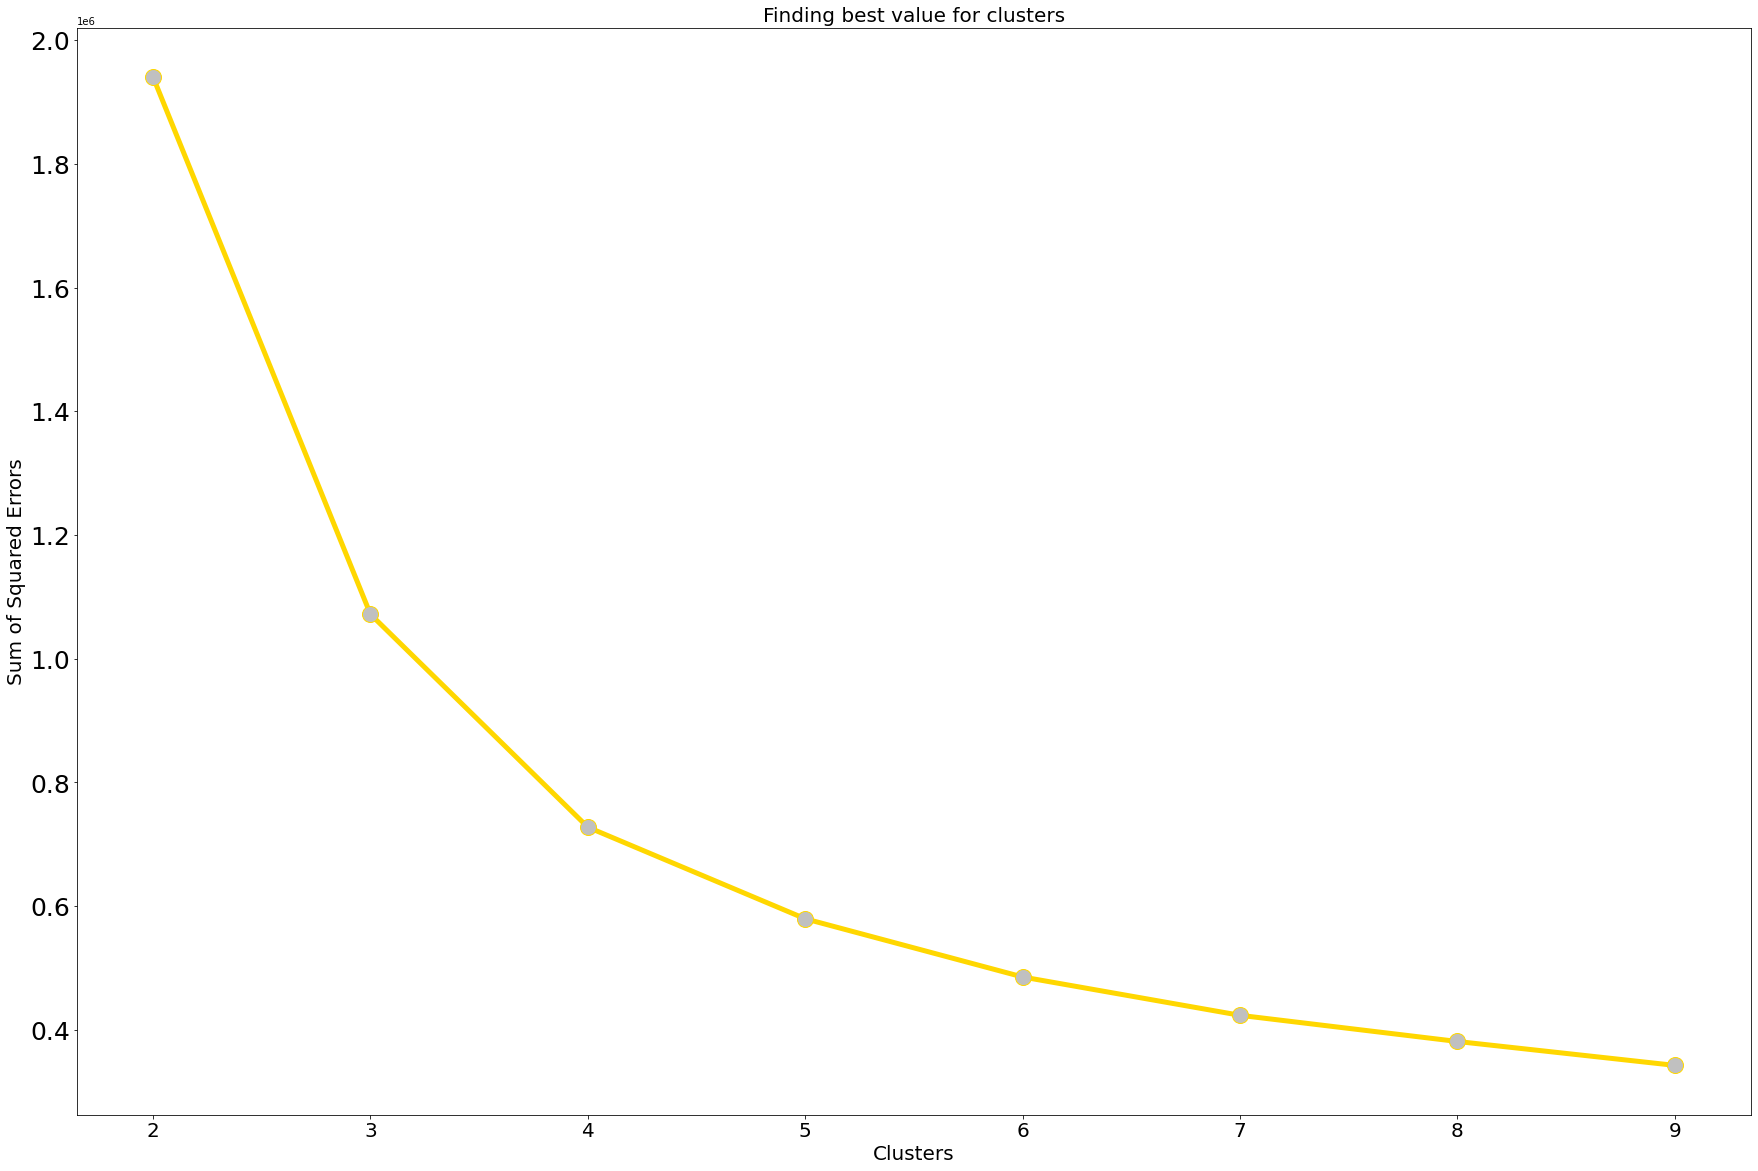

In [405]:
plt.figure(figsize=(30,20))
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(2,10),sse,color='gold',linewidth=5.0,marker='o',markersize=16,markerfacecolor='silver')
plt.xlabel('Clusters',fontdict={'size':20})
plt.ylabel('Sum of Squared Errors',fontdict={'size':20})
plt.title('Finding best value for clusters',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.show()

Note: By elbow method, the best no of clusters for that scatter plot is 4 as elbow is being formed at 4.

#### Initialising with model with 4 clusters

In [406]:
kmeans=KMeans(n_clusters=4)

#### Fitting our training data into the model and predicting the center of clusters 

In [407]:
cl=kmeans.fit_predict(df[['Previous Scores','Performance Index']])

#### Printing the centers

In [408]:
center=kmeans.cluster_centers_
print(center)

[[60.81413911 46.85898898]
 [91.49493312 79.79651398]
 [47.06       30.06521739]
 [77.05572636 62.6264412 ]]


#### Creating another dataset to show which row belongs to which cluster without harming original data

In [409]:
dfle=df
dfle['cluster']=cl
dfle.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Pass,cluster
0,7,99,1,9,1,91.0,1,1
1,4,82,0,4,2,65.0,1,3
2,8,51,1,7,2,45.0,0,0
3,5,52,1,5,2,36.0,0,2
4,7,75,0,8,5,66.0,1,3


#### Previous Scores vs Performance Index-Scatter Plot with 4 clusters

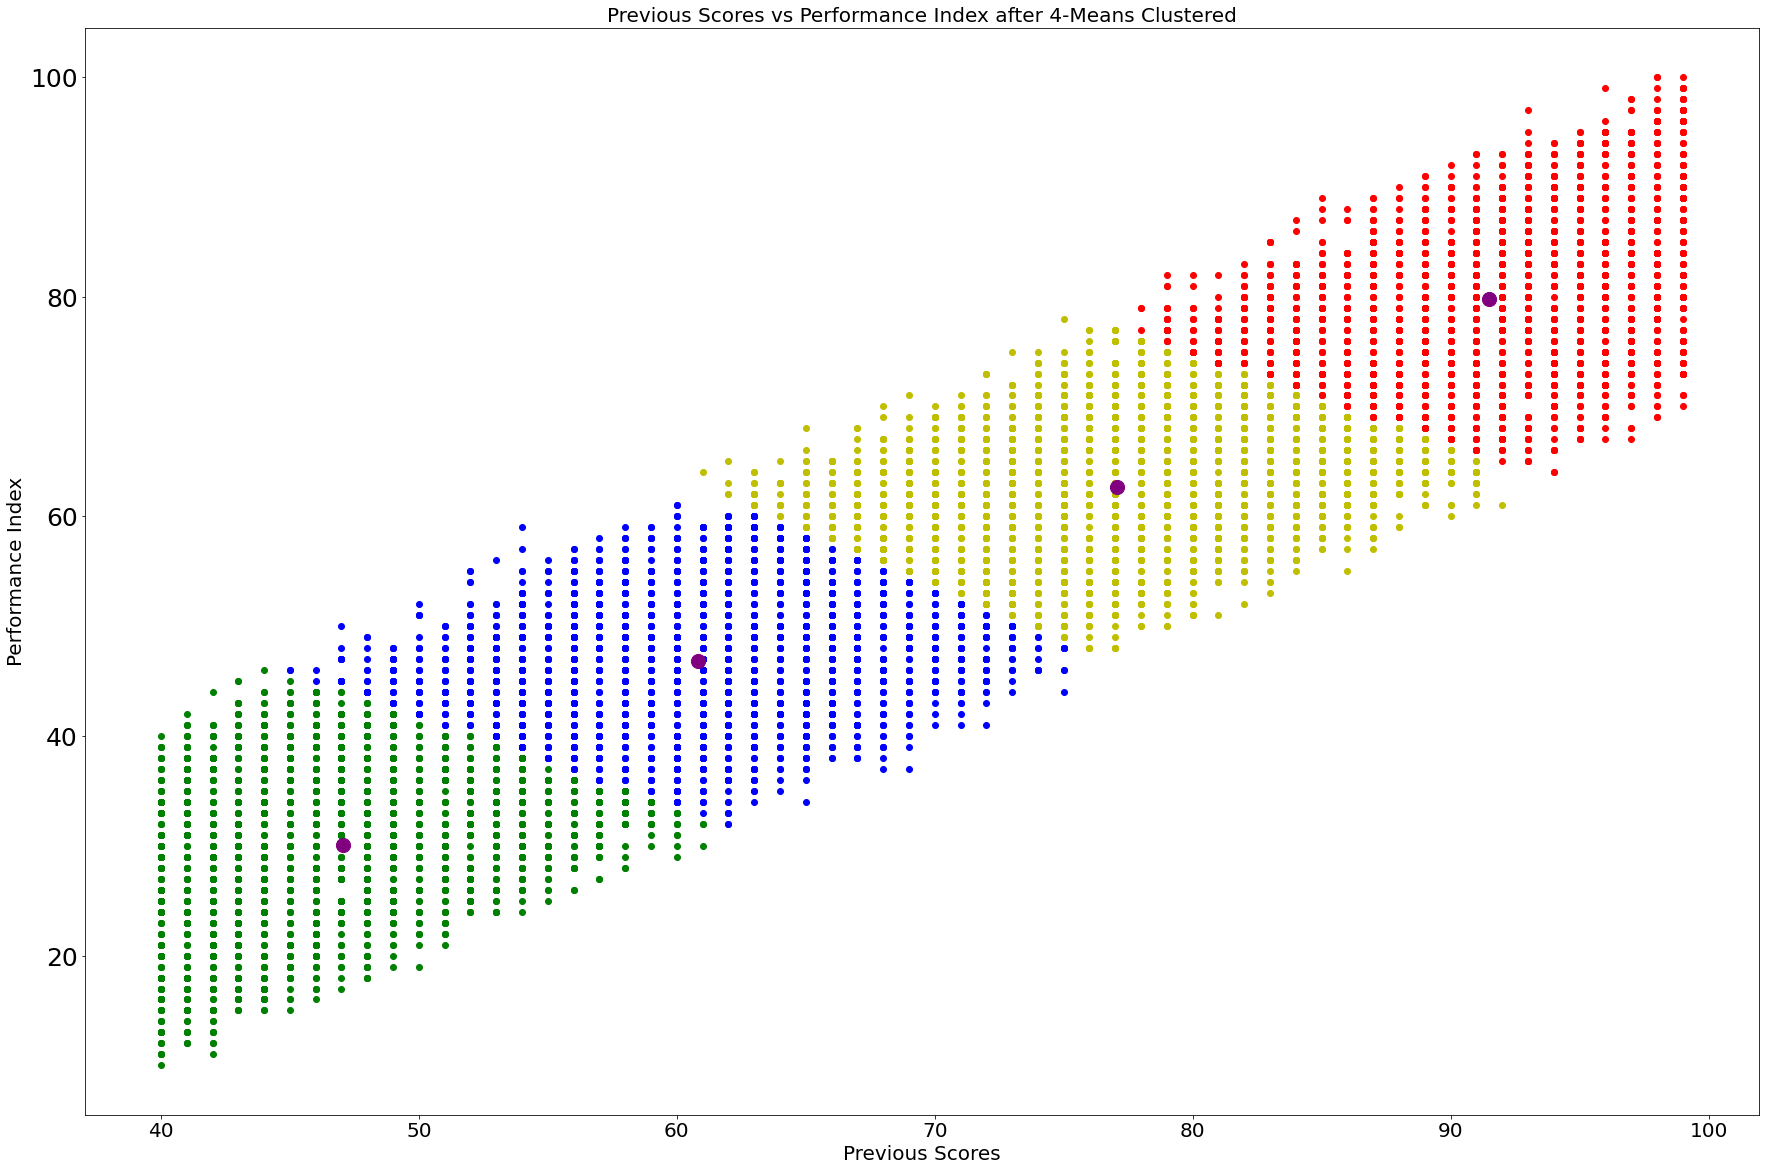

In [410]:
plt.figure(figsize=(30,20))
df1=dfle[dfle['cluster']==0]
df2=dfle[dfle['cluster']==1]
df3=dfle[dfle['cluster']==2]
df4=dfle[dfle['cluster']==3]
plt.scatter(df1['Previous Scores'],df1['Performance Index'],color='b')
plt.scatter(df2['Previous Scores'],df2['Performance Index'],color='r')
plt.scatter(df3['Previous Scores'],df3['Performance Index'],color='g')
plt.scatter(df4['Previous Scores'],df4['Performance Index'],color='y')
plt.scatter(center[:,0],center[:,1],color='purple',marker='o',s=200)
plt.xlabel('Previous Scores',fontdict={'size':20})
plt.ylabel('Performance Index',fontdict={'size':20})
plt.title('Previous Scores vs Performance Index after 4-Means Clustered',fontdict={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)
plt.show()

Note: The following scatter plot is divided into four clusters- red cluster, yellow cluster, green cluster and blue cluster. The center of those clusters is marked by purple dots. 

## Conclusion

1. Our Linear Regression Model has 2% Mean Absolute Error and Root Mean Square Error for predicting Performance Index
2. Our Logistic Regression Model has 98% accurate f1 score for predicting Pass
3. Our Decision Tree Model has 97% accurate f1 score for predicting Pass
4. Our Random Forest Model has 98% accurate f1 score for predicting Pass
5. Our Support Vector Machine Model has 97% accurate f1 score for predicting Pass
6. Our K-Means Clustering Algorithm divides Previous Scores vs Performance Index into 4 clusters